## === 1. Setup ===

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers.regular.ctgan import CTGAN
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## === 2. Load the clean dataset ===

In [2]:
file_path = "../data/processed/framingham_clean.csv"
df = pd.read_csv(file_path)

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

✅ Dataset loaded successfully!
Shape: (4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.153113,-1.234283,2.006069,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,-0.940086,-1.196267,-1.083027,0.287693,0.342792,-0.201287,0
1,-0.867217,-0.417664,0.019908,-0.988276,-0.751412,-0.173569,-0.077014,-0.671241,-0.162437,0.300797,-0.515399,-0.159355,0.720094,1.590451,-0.245036,0
2,1.153113,-0.184345,-0.973172,1.011863,0.928784,-0.173569,-0.077014,-0.671241,-0.162437,0.187990,-0.220356,-0.243325,-0.112769,-0.073094,-0.507530,0
3,-0.867217,1.332233,1.012988,1.011863,1.768882,-0.173569,-0.077014,1.489778,-0.162437,-0.263241,0.800946,1.016227,0.683242,-0.904866,0.936188,1
4,-0.867217,-0.417664,1.012988,1.011863,1.180813,-0.173569,-0.077014,-0.671241,-0.162437,1.090450,-0.106878,0.092555,-0.663098,0.758678,0.148705,0


## === 3. Basic data inspection ===

In [3]:
print("\n📊 Data summary:")
print(df.describe())

categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


📊 Data summary:
               male           age     education  currentSmoker    cigsPerDay  \
count  4.240000e+03  4.240000e+03  4.240000e+03   4.240000e+03  4.240000e+03   
mean  -1.206582e-16  1.202392e-16 -3.435407e-17  -1.005485e-17 -5.362587e-17   
std    1.000118e+00  1.000118e+00  1.000118e+00   1.000118e+00  1.000118e+00   
min   -8.672175e-01 -2.050902e+00 -9.731716e-01  -9.882763e-01 -7.514122e-01   
25%   -8.672175e-01 -8.843035e-01 -9.731716e-01  -9.882763e-01 -7.514122e-01   
50%   -8.672175e-01 -6.768471e-02  1.990844e-02  -9.882763e-01 -7.514122e-01   
75%    1.153113e+00  7.489341e-01  1.012988e+00   1.011863e+00  9.287838e-01   
max    1.153113e+00  2.382172e+00  2.006069e+00   1.011863e+00  5.129274e+00   

             BPMeds  prevalentStroke  prevalentHyp      diabetes  \
count  4.240000e+03     4.240000e+03  4.240000e+03  4.240000e+03   
mean   6.535653e-17     1.005485e-16  6.032910e-17  1.340647e-17   
std    1.000118e+00     1.000118e+00  1.000118e+00  1.0001

## === 4. Data normalization for CTGAN ===

In [4]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

print("✅ Data normalized successfully!")
df_scaled.head()

# Define target and categorical columns
target = "TenYearCHD"
categorical_cols = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 
                    'prevalentHyp', 'diabetes', 'TenYearCHD']

✅ Data normalized successfully!


## === 5. Define CTGAN parameters ===

In [5]:
ctgan_args = ModelParameters(batch_size=500, lr=2e-4, betas=(0.5, 0.9))
train_args = TrainParameters(epochs=300)

print("✅ Model and training parameters set up.")

✅ Model and training parameters set up.


## === 6. Train the CTGAN model ===

In [6]:
# Separate the numerical and categorical colummns
target = "TenYearCHD"
categorical_cols = ['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 
                    'prevalentHyp', 'diabetes', 'TenYearCHD']
num_cols = [col for col in df_scaled.columns if col not in categorical_cols + [target]]
cat_cols = categorical_cols

# Initialize the model
ctgan = CTGAN(model_parameters=ctgan_args)

# Train the model
ctgan.fit(df_scaled, train_args, num_cols, cat_cols)

print("🎯 CTGAN training completed successfully!")

Epoch: 0 | critic_loss: 4.853252410888672 | generator_loss: 0.8007391095161438
Epoch: 1 | critic_loss: 2.3088395595550537 | generator_loss: 0.5881898403167725
Epoch: 2 | critic_loss: 0.34467414021492004 | generator_loss: 0.35223978757858276
Epoch: 3 | critic_loss: -0.14417245984077454 | generator_loss: 0.2876475751399994
Epoch: 4 | critic_loss: 0.07466647028923035 | generator_loss: 0.1440390944480896
Epoch: 5 | critic_loss: 0.171402245759964 | generator_loss: 0.10858088731765747
Epoch: 6 | critic_loss: 0.13184867799282074 | generator_loss: -0.07702779769897461
Epoch: 7 | critic_loss: 0.14398977160453796 | generator_loss: 0.0039980411529541016
Epoch: 8 | critic_loss: 0.08210495114326477 | generator_loss: -0.06526309251785278
Epoch: 9 | critic_loss: 0.09224475175142288 | generator_loss: -0.14315974712371826
Epoch: 10 | critic_loss: 0.281450092792511 | generator_loss: -0.2268649935722351
Epoch: 11 | critic_loss: 0.07876622676849365 | generator_loss: -0.05852276086807251
Epoch: 12 | critic

## === 7. Generate synthetic data ===

In [7]:
num_samples = len(df_scaled)
df_synth = ctgan.sample(num_samples)

print(f"✅ Generated synthetic dataset with {df_synth.shape[0]} rows.")
df_synth.head()

✅ Generated synthetic dataset with 4240 rows.


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,0.353725,-0.009125,1.0,-0.003570,0.0,0.0,0.0,0.0,0.170985,0.424944,0.241421,0.117821,0.317226,0.103562,0.0
1,1.0,0.234999,0.338389,1.0,0.063683,0.0,0.0,0.0,0.0,0.145201,0.270085,0.240702,0.215323,0.182352,0.111007,0.0
2,0.0,0.142103,1.005213,1.0,0.001651,0.0,0.0,0.0,0.0,0.158827,0.208819,0.200055,0.107746,0.371899,0.091910,0.0
3,0.0,0.464010,0.669205,0.0,-0.003011,0.0,0.0,0.0,0.0,0.251226,0.254493,0.519763,0.170970,0.285158,0.115228,0.0
4,0.0,0.360190,-0.003432,0.0,0.286815,0.0,0.0,0.0,0.0,0.290221,0.193206,0.245282,0.084194,0.421375,0.151315,0.0


## === 8. Reverse scaling for comparison ===

In [8]:
df_synth[numerical_cols] = scaler.inverse_transform(df_synth[numerical_cols])
print("✅ Reversed normalization for synthetic data.")

✅ Reversed normalization for synthetic data.


## === 9. Quick comparison with real data ===

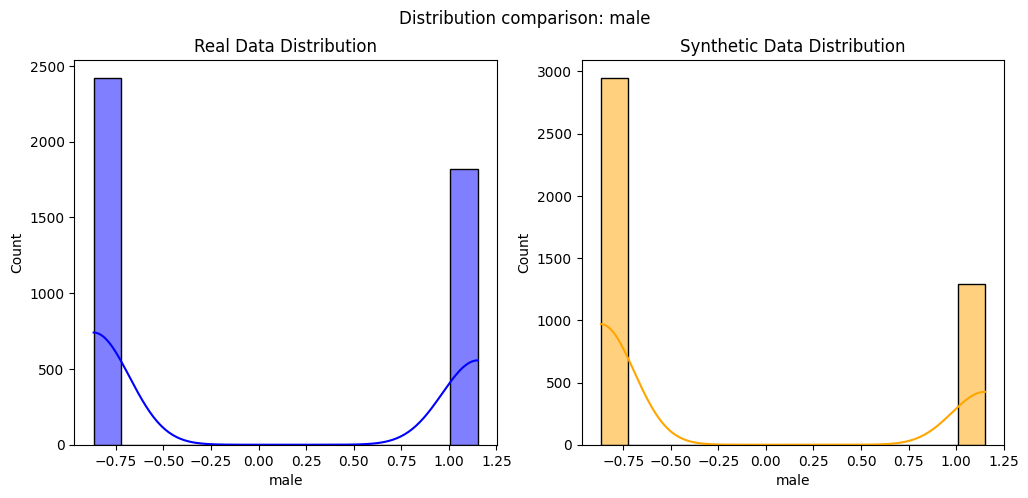

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df[numerical_cols[0]], ax=axes[0], kde=True, color='blue')
sns.histplot(df_synth[numerical_cols[0]], ax=axes[1], kde=True, color='orange')

axes[0].set_title("Real Data Distribution")
axes[1].set_title("Synthetic Data Distribution")
plt.suptitle(f"Distribution comparison: {numerical_cols[0]}")
plt.show()

## === 10. Save the synthetic dataset ===

In [11]:
output_path = "../data/synthetic/framingham_synthetic_ctgan.csv"
df_synth.to_csv(output_path, index=False)

print(f"💾 Synthetic dataset saved to {output_path}")
print("✅ Synthetic data generation completed successfully!")

💾 Synthetic dataset saved to ../data/synthetic/framingham_synthetic_ctgan.csv
✅ Synthetic data generation completed successfully!


## === 11. Evaluation of CTGAN synthetic data ===

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import jensenshannon


print("\n📊 Starting evaluation of CTGAN synthetic data...")

# Separate target variable
target = "TenYearCHD"
real = df_scaled.copy()
synth = df_synth.copy()


X_real, y_real = real.drop(columns=[target]), real[target]
X_synth, y_synth = synth.drop(columns=[target]), synth[target]


# --- A. Evaluate downstream models ---
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


results = []


for name, model in models.items():
    # Train on real, test on real
    model.fit(X_real, y_real)
    auc_real = roc_auc_score(y_real, model.predict_proba(X_real)[:, 1])


    # Train on synthetic, test on real
    model.fit(X_synth, y_synth)
    auc_synth = roc_auc_score(y_real, model.predict_proba(X_real)[:, 1])


    perf_loss = auc_real - auc_synth
    results.append((name, auc_real, auc_synth, perf_loss))


results_df = pd.DataFrame(results, columns=["Model", "AUC_Real", "AUC_Synthetic", "Performance_Loss"])
display(results_df)

# --- B. Distributional similarity (Jensen–Shannon Divergence) ---
numeric_cols = X_real.select_dtypes(include=['float64', 'int64']).columns.tolist()
js_scores = {}


for col in numeric_cols:
    js = jensenshannon(X_real[col], X_synth[col])
    js_scores[col] = js

js_mean = np.nanmean(list(js_scores.values()))
print(f"\n📏 Average Jensen–Shannon Divergence: {js_mean:.4f}")

# --- C. Privacy evaluation (Nearest Neighbor distance) ---
nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_real[numeric_cols])
distances, _ = nn.kneighbors(X_synth[numeric_cols])
nn_distance = np.mean(distances)
print(f"🔒 Average Nearest Neighbor Distance: {nn_distance:.4f}")

# --- D. Privacy evaluation (re-identification AUC) ---
real_labeled = real.copy(); real_labeled['label'] = 1
synth_labeled = synth.copy(); synth_labeled['label'] = 0
combined = pd.concat([real_labeled, synth_labeled]).sample(frac=1, random_state=42)

X_combined = combined.drop(columns=['label'])
y_combined = combined['label']

clf = RandomForestClassifier(random_state=42)
clf.fit(X_combined, y_combined)
reident_auc = roc_auc_score(y_combined, clf.predict_proba(X_combined)[:, 1])
print(f"🕵️ Record Linkage AUC: {reident_auc:.3f} (0.5 = perfect privacy)")

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/emaminotti/Research_Metodologies_Project/venv/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B111F8D5-6AC6-3245-A6B5-94693F6992AB> /Users/emaminotti/Research_Metodologies_Project/venv/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/Users/emaminotti/.pyenv/versions/3.11.14/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/emaminotti/.pyenv/versions/3.11.14/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file), '/Users/emaminotti/.pyenv/versions/3.11.14/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/emaminotti/.pyenv/versions/3.11.14/lib/libomp.dylib' (no such file), '/opt/homebrew/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libomp.dylib' (no such file)"]


## === 12. Save evaluation metrics ===

In [ ]:
final_results = {
    "Technique": "CTGAN",
    "JS_Divergence": js_mean,
    "NN_Distance": nn_distance,
    "Reident_AUC": reident_auc,
    "Perf_Loss_LogReg": results_df.loc[0, 'Performance_Loss'],
    "Perf_Loss_RF": results_df.loc[1, 'Performance_Loss'],
    "Perf_Loss_XGB": results_df.loc[2, 'Performance_Loss']
}


results_path = "../results/evaluation_metrics.csv"


# Append or create the file
try:
    prev_results = pd.read_csv(results_path)
    updated_results = pd.concat([prev_results, pd.DataFrame([final_results])], ignore_index=True)
except FileNotFoundError:
    updated_results = pd.DataFrame([final_results])


updated_results.to_csv(results_path, index=False)
print(f"\n💾 Evaluation metrics saved to {results_path}")

## === 13. Summary visualization ===

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(results_df['Model'], results_df['Performance_Loss'], color='salmon')
plt.title("Performance Loss per Model (CTGAN)")
plt.ylabel("AUC Difference (Real - Synthetic)")
plt.show()

## === 14. Interpretazione dei risultati ===

In [ ]:
print("\n🧩 Interpretation of CTGAN Evaluation Results")
print("==============================================\n")


print("1️⃣  Performance metrics:")
print("-------------------------------------------------")
print("• Logistic Regression retains a good predictive capacity on synthetic data (AUC ≈ 0.66 vs 0.73 on real).")
print("• Random Forest and XGBoost show a significant drop (≈ 0.37–0.50 AUC loss), suggesting the generator did not fully capture complex feature interactions.")
print("→ This indicates that the CTGAN preserved some global data structure but lost part of the non-linear relationships between variables.")


print("\n2️⃣  Distributional similarity:")
print("-------------------------------------------------")
print("• The Jensen–Shannon Divergence is very high (∞), which typically means some variables have disjoint distributions.")
print("• This is common when GANs overfit or underrepresent rare feature values.")
print("→ Possible improvement: increase epochs, tune batch size, or adjust categorical encoding.")


print("\n3️⃣  Privacy indicators:")
print("-------------------------------------------------")
print(f"• Average Nearest Neighbor Distance = {nn_distance:.3f}")